The plotting utilities and various visualization tools for this notebook depend on [degas](https://github.com/williamgilpin/degas) and [tsfresh](https://tsfresh.readthedocs.io/en/latest/)

In [1]:
import sys

import matplotlib.pyplot as plt
import json

import pandas as pd
import dysts
from dysts.datasets import *
from dysts.utils import *



try:
    from degas import *
except:
    pass

import degas as dg
FIGURE_PATH = "./private_writing/fig_resources/"

%load_ext autoreload
%autoreload 2

In [2]:
data_path = dysts.data_path

with open(data_path, "r") as file:
    data = json.load(file)
print(f"Total models being analyzed is {len(data.keys())}.")


all_lyapunov = list()
all_correlation_dimensions = list()
all_kaplan_yorke_dimensions = list()
all_dynamical_dimensions = list()
for item in data:
    all_lyapunov.append(data[item]["maximum_lyapunov_estimated"] * data[item]["period"])
    all_correlation_dimensions.append(data[item]["correlation_dimension"])
    all_kaplan_yorke_dimensions.append(data[item]["kaplan_yorke_dimension"])
    all_dynamical_dimensions.append(len(data[item]["initial_conditions"]))

plt.figure()
plt.hist(all_correlation_dimensions)
plt.xlim([0, 3])

plt.figure()
histvals, bins = np.histogram(all_lyapunov)
plt.semilogy(3 + bins[:-1], histvals, '.k')

Total models being analyzed is 131.


In [4]:
# featurize a single file

dataset = TimeSeriesDataset("dysts/data/train_univariate__pts_per_period_100__periods_10.json")
feature_df = featurize_timeseries(dataset)


Feature Extraction: 100%|██████████| 33/33 [00:22<00:00,  1.44it/s]


In [5]:
# chunk and featurize several time windows


all_feature_dfs = list()
for i in np.linspace(0, 8000, 40).astype(int):
    dataset = TimeSeriesDataset("dysts/data/large_univariate__pts_per_period_100__periods_100.json")
    dataset.trim_series(i, i + 2000)
    feature_df = featurize_timeseries(dataset)
    all_feature_dfs.append(feature_df)
    print(i)
    
## Prune features not detected across all replicates
all_feature_lists = [set(item.columns.to_list()) for item in all_feature_dfs]
common_features = np.array(list(all_feature_lists[0].intersection(*all_feature_lists[1:])))
print(f"{len(common_features)} common features found.")
for i in range(len(all_feature_dfs)):
    all_feature_dfs[i] = all_feature_dfs[i][common_features]

rep_stds = np.std(np.dstack([np.array(df) for df in all_feature_dfs]), axis=-1)
topk_feature_inds = np.squeeze(np.array([np.argsort(np.median(rep_stds, axis=0))]))[:100]
feat_arr_all = np.dstack([np.array(df)[:, topk_feature_inds] for df in all_feature_dfs])
feat_arr_all = np.transpose(feat_arr_all, (2, 0, 1))
feat_arr_all.dump("benchmarks/resources/feat_arr_all.pkl")




Feature Extraction: 100%|██████████| 33/33 [01:14<00:00,  2.25s/it]


0


Feature Extraction: 100%|██████████| 33/33 [01:15<00:00,  2.28s/it]


205


Feature Extraction: 100%|██████████| 33/33 [01:13<00:00,  2.23s/it]


410


Feature Extraction: 100%|██████████| 33/33 [01:29<00:00,  2.72s/it]


615


Feature Extraction: 100%|██████████| 33/33 [01:17<00:00,  2.34s/it]


820


Feature Extraction: 100%|██████████| 33/33 [01:15<00:00,  2.29s/it]


1025


Feature Extraction: 100%|██████████| 33/33 [01:18<00:00,  2.38s/it]


1230


Feature Extraction: 100%|██████████| 33/33 [01:18<00:00,  2.38s/it]


1435


Feature Extraction: 100%|██████████| 33/33 [01:19<00:00,  2.40s/it]


1641


Feature Extraction: 100%|██████████| 33/33 [01:15<00:00,  2.29s/it]


1846


Feature Extraction: 100%|██████████| 33/33 [01:18<00:00,  2.37s/it]


2051


Feature Extraction: 100%|██████████| 33/33 [01:17<00:00,  2.35s/it]


2256


Feature Extraction: 100%|██████████| 33/33 [01:20<00:00,  2.45s/it]


2461


Feature Extraction: 100%|██████████| 33/33 [01:19<00:00,  2.42s/it]


2666


Feature Extraction: 100%|██████████| 33/33 [01:19<00:00,  2.40s/it]


2871


Feature Extraction: 100%|██████████| 33/33 [01:20<00:00,  2.43s/it]


3076


Feature Extraction: 100%|██████████| 33/33 [01:23<00:00,  2.54s/it]


3282


Feature Extraction: 100%|██████████| 33/33 [01:19<00:00,  2.40s/it]


3487


Feature Extraction: 100%|██████████| 33/33 [01:21<00:00,  2.47s/it]


3692


Feature Extraction: 100%|██████████| 33/33 [01:19<00:00,  2.42s/it]


3897


Feature Extraction: 100%|██████████| 33/33 [01:19<00:00,  2.40s/it]


4102


Feature Extraction: 100%|██████████| 33/33 [01:20<00:00,  2.43s/it]


4307


Feature Extraction: 100%|██████████| 33/33 [01:19<00:00,  2.42s/it]


4512


Feature Extraction: 100%|██████████| 33/33 [01:19<00:00,  2.42s/it]


4717


Feature Extraction: 100%|██████████| 33/33 [01:19<00:00,  2.42s/it]


4923


Feature Extraction: 100%|██████████| 33/33 [01:20<00:00,  2.43s/it]


5128


Feature Extraction: 100%|██████████| 33/33 [01:20<00:00,  2.44s/it]


5333


Feature Extraction: 100%|██████████| 33/33 [01:22<00:00,  2.51s/it]


5538


Feature Extraction: 100%|██████████| 33/33 [01:21<00:00,  2.46s/it]


5743


Feature Extraction: 100%|██████████| 33/33 [01:18<00:00,  2.39s/it]


5948


Feature Extraction: 100%|██████████| 33/33 [01:18<00:00,  2.37s/it]


6153


Feature Extraction: 100%|██████████| 33/33 [01:18<00:00,  2.37s/it]


6358


Feature Extraction: 100%|██████████| 33/33 [01:17<00:00,  2.36s/it]


6564


Feature Extraction: 100%|██████████| 33/33 [01:20<00:00,  2.43s/it]


6769


Feature Extraction: 100%|██████████| 33/33 [01:16<00:00,  2.31s/it]


6974


Feature Extraction: 100%|██████████| 33/33 [01:21<00:00,  2.46s/it]


7179


Feature Extraction: 100%|██████████| 33/33 [01:12<00:00,  2.18s/it]


7384


Feature Extraction: 100%|██████████| 33/33 [01:13<00:00,  2.24s/it]


7589


Feature Extraction: 100%|██████████| 33/33 [01:12<00:00,  2.19s/it]


7794


Feature Extraction: 100%|██████████| 33/33 [01:15<00:00,  2.29s/it]


8000
735 common features found.


In [6]:
# feat_arr_all = np.load("benchmarks/resources/feat_arr_all.pkl", allow_pickle=True) # Reload without having to re-run featurization
features_mean = np.median(feat_arr_all, axis=0)
feat_arr_all_flat = np.reshape(feat_arr_all, (-1, feat_arr_all.shape[-1]))
feat_arr = features_mean

In [9]:
%matplotlib inline

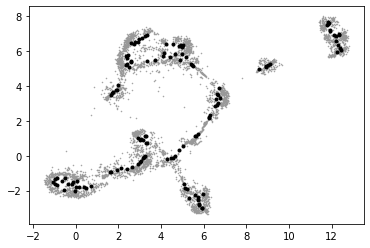

In [10]:
import umap
# model =  PCA(n_components=2, random_state=0)
# model = umap.UMAP(random_state=0, densmap=True)

# from umap.parametric_umap import ParametricUMAP
# model = ParametricUMAP(densmap=False)
model = umap.UMAP(random_state=15, n_neighbors=5)

embedding_mean = model.fit_transform(features_mean)
embedding_all = model.transform(feat_arr_all_flat)


plt.plot(embedding_all[:, 0], embedding_all[:, 1], '.', color=[0.6, 0.6, 0.6], markersize=1)
plt.plot(embedding_mean[:, 0], embedding_mean[:, 1], '.k')

In [383]:
all_attributes = list()
for item in dataset.names:
    model_dyn = getattr(dysts.flows, item)()
    all_attributes.append(model_dyn.maximum_lyapunov_estimated)
all_attributes = np.array(all_attributes)

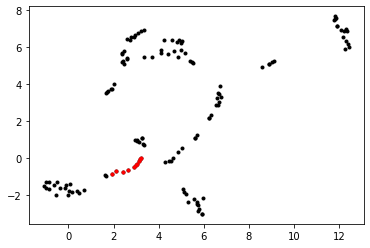

In [99]:

plt.plot(
    embedding_mean[:, 0], 
    embedding_mean[:, 1],
    ".k"
)
view_ind = 11
plt.plot(
    embedding_mean[:, 0][labels_mean == view_ind], 
    embedding_mean[:, 1][labels_mean == view_ind],
    ".r"
)

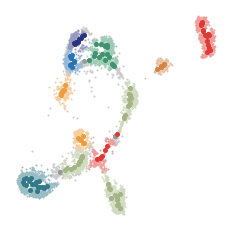

In [106]:
import hdbscan


## Cluster data
clusterer = hdbscan.HDBSCAN(min_cluster_size=4, prediction_data=True)
labels_mean = clusterer.fit_predict(embedding_mean)
labels_all, _ = hdbscan.approximate_predict(clusterer, embedding_all)




## Swap colors for better visualization
i_s, j_s = 3, 9
labels_mean[labels_mean == i_s], labels_mean[labels_mean == j_s] = (j_s, i_s)
labels_all[labels_all == i_s], labels_all[labels_all == j_s] = (j_s, i_s)

all_name_clusters = list()
for label in np.unique(labels_mean):
    
    if label >= 0:
        all_name_clusters.append(dataset.names[labels_mean == label])
#         color_val = pastel_rainbow_interpolated[label]
        color_val = dg.pastel_rainbow[label % 8]
#         color_val = dg.pastel_rainbow[label]
    else:
        color_val = (0.6, 0.6, 0.6)
    
    plt.plot(
        embedding_all[labels_all == label, 0], 
         embedding_all[labels_all == label, 1],  
         '.', markersize=2, color=dg.lighter(color_val, 0.5))
    plt.plot(embedding_mean[labels_mean == label, 0], 
             embedding_mean[labels_mean == label, 1],  
             '.', color=color_val,
            markersize=8)

fixed_aspect_ratio(1)
dg.vanish_axes()
# dg.better_savefig(FIGURE_PATH + "clustered_umap")

/Users/williamgilpin/program_repos/dysts/dysts/base.py:166: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn("This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.")
/Users/williamgilpin/program_repos/dysts/dysts/base.py:166: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn("This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.")
/Users/williamgilpin/program_repos/dysts/dysts/base.py:166: UserWarning: This system has at least on

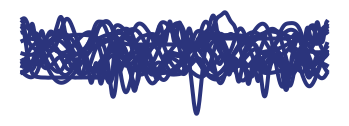

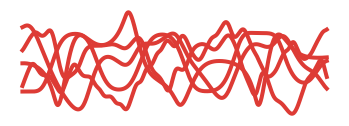

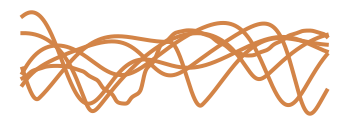

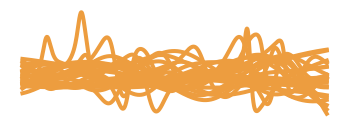

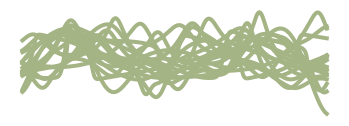

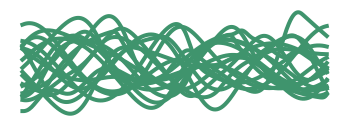

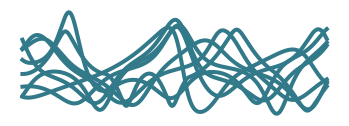

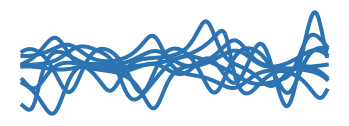

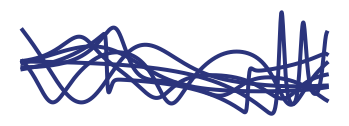

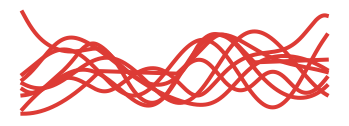

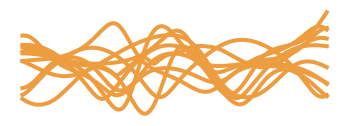

In [20]:
import dysts.flows

for label, cluster in zip(np.unique(labels_mean), all_name_clusters):
    color_val = dg.pastel_rainbow[label % 8]
    plt.figure()
    for item in cluster:
        model_dyn = getattr(dysts.flows, item)()
        sol = model_dyn.make_trajectory(1000, resample=True, standardize=True, pts_per_period=500)
        #plt.plot(sol[:, 0], sol[:, 1], color=color_val)
        plt.plot(sol[:, 0], color=color_val, linewidth=4)
    fixed_aspect_ratio(1/3)
    dg.vanish_axes()
#     dg.better_savefig(FIGURE_PATH + f"ts{label}.png")
        

In [ ]:
## Next step: Assign feature importance

+ Fit a RandomForest to pseudolabels?


<ipython-input-15-f22f9d511368>:8: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(embedding[:, 0], embedding[:, 1], c=np.log10(lyaps))


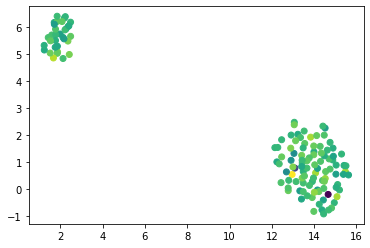

In [15]:
# names = np.array(list(data.keys()))
# lyaps = np.array([getattr(dysts.flows, item)().maximum_lyapunov_estimated for item in data])
# kydims = [getattr(dysts.flows, item)().kaplan_yorke_dimension for item in data]
# cdims = [getattr(dysts.flows, item)().correlation_dimension for item in data]
# minmag = [np.min(np.abs(getattr(dysts.flows, item)().lyapunov_spectrum_estimated)) for item in data]
# dtvals = np.array([getattr(dysts.flows, item)().dt for item in data])
# periods = np.array([getattr(dysts.flows, item)().period for item in data])
plt.scatter(embedding[:, 0], embedding[:, 1], c=np.log10(lyaps))

In [172]:
from scipy.stats import spearmanr

top_features = list()
for i, feats in enumerate(feat_arr.T):
    max_corr = max(
        np.abs(spearmanr(embedding[:, 0] + embedding[:, 1], feats).correlation),
        np.abs(spearmanr(embedding[:, 0] + embedding[:, 1], feats).correlation)
       )
    if max_corr > 0.5:
        top_features.append((i, feat_names[i], max_corr))
sort_inds = np.argsort([item[2] for item in top_features])[::-1].astype(int)
top_features = np.array(top_features)[sort_inds]
print(top_features[:10])

[['622' 'value__fft_aggregated__aggtype_"variance"' '0.9937917044787273']
 ['624' 'value__fft_aggregated__aggtype_"kurtosis"' '0.9430950728660652']
 ['623' 'value__fft_aggregated__aggtype_"skew"' '0.8482570864250254']
 ['621' 'value__fft_aggregated__aggtype_"centroid"' '0.8245662734212352']
 ['516' 'value__fft_coefficient__attr_"abs"__coeff_95'
  '0.5509528639299632']
 ['515' 'value__fft_coefficient__attr_"abs"__coeff_94'
  '0.5404953824801153']
 ['520' 'value__fft_coefficient__attr_"abs"__coeff_99'
  '0.5162120322425666']
 ['519' 'value__fft_coefficient__attr_"abs"__coeff_98'
  '0.5098596060428122']]


# Plot example dynamics

In [118]:
dysts.base.get_attractor_list()

['Aizawa',
 'AnishchenkoAstakhov',
 'Arneodo',
 'ArnoldBeltramiChildress',
 'ArnoldWeb',
 'BeerRNN',
 'BelousovZhabotinsky',
 'BickleyJet',
 'Blasius',
 'BlinkingRotlet',
 'BlinkingVortex',
 'Bouali',
 'Bouali2',
 'BurkeShaw',
 'CaTwoPlus',
 'CaTwoPlusQuasiperiodic',
 'CellCycle',
 'CellularNeuralNetwork',
 'Chen',
 'ChenLee',
 'Chua',
 'CircadianRhythm',
 'CoevolvingPredatorPrey',
 'Colpitts',
 'Coullet',
 'Dadras',
 'DequanLi',
 'DoubleGyre',
 'DoublePendulum',
 'Duffing',
 'ExcitableCell',
 'Finance',
 'FluidTrampoline',
 'ForcedBrusselator',
 'ForcedFitzHughNagumo',
 'ForcedVanDerPol',
 'GenesioTesi',
 'GuckenheimerHolmes',
 'Hadley',
 'Halvorsen',
 'HastingsPowell',
 'HenonHeiles',
 'HindmarshRose',
 'Hopfield',
 'HyperBao',
 'HyperCai',
 'HyperJha',
 'HyperLorenz',
 'HyperLu',
 'HyperPang',
 'HyperQi',
 'HyperRossler',
 'HyperWang',
 'HyperXu',
 'HyperYan',
 'HyperYangChen',
 'IkedaDelay',
 'IsothermalChemical',
 'ItikBanksTumor',
 'JerkCircuit',
 'KawczynskiStrizhak',
 'Laser',


In [18]:
all_name_clusters

[array(['BeerRNN', 'DoublePendulum', 'HastingsPowell', 'JerkCircuit',
        'Lorenz84', 'Lorenz96', 'LuChen', 'PiecewiseCircuit', 'SprottF',
        'SprottH', 'SprottL', 'SprottO', 'Torus', 'TurchinHanski',
        'VossDelay'], dtype='<U23'),
 array(['MackeyGlass', 'OscillatingFlow', 'Thomas', 'ThomasLabyrinth',
        'YuWang'], dtype='<U23'),
 array(['ArnoldWeb', 'Colpitts', 'IsothermalChemical', 'SprottK',
        'SprottQ', 'SprottR'], dtype='<U23'),
 array(['Bouali2', 'ChenLee', 'Chua', 'Coullet', 'Dadras', 'DequanLi',
        'ExcitableCell', 'FluidTrampoline', 'ForcedBrusselator',
        'GuckenheimerHolmes', 'Hadley', 'HyperRossler', 'HyperYan',
        'ItikBanksTumor', 'KawczynskiStrizhak', 'Rucklidge', 'SprottB',
        'SprottD', 'SprottDelay', 'SprottE', 'SprottTorus',
        'StickSlipOscillator', 'WangSun', 'YuWang2'], dtype='<U23'),
 array(['Aizawa', 'CaTwoPlus', 'CaTwoPlusQuasiperiodic', 'Chen',
        'CircadianRhythm', 'Finance', 'ForcedFitzHughNagumo',
    

In [28]:
[all_name_clusters[i] for i in [0, 2, 4]]

[array(['BeerRNN', 'DoublePendulum', 'HastingsPowell', 'JerkCircuit',
        'Lorenz84', 'Lorenz96', 'LuChen', 'PiecewiseCircuit', 'SprottF',
        'SprottH', 'SprottL', 'SprottO', 'Torus', 'TurchinHanski',
        'VossDelay'], dtype='<U23'),
 array(['ArnoldWeb', 'Colpitts', 'IsothermalChemical', 'SprottK',
        'SprottQ', 'SprottR'], dtype='<U23'),
 array(['Aizawa', 'CaTwoPlus', 'CaTwoPlusQuasiperiodic', 'Chen',
        'CircadianRhythm', 'Finance', 'ForcedFitzHughNagumo',
        'ForcedVanDerPol', 'Halvorsen', 'HyperLorenz', 'LorenzCoupled',
        'LorenzStenflo', 'MacArthur', 'MooreSpiegel', 'RayleighBenard',
        'Sakarya', 'SprottG'], dtype='<U23')]

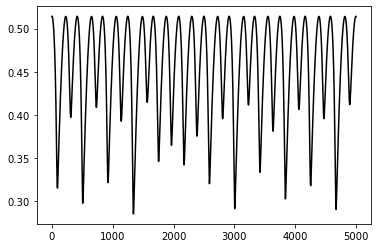

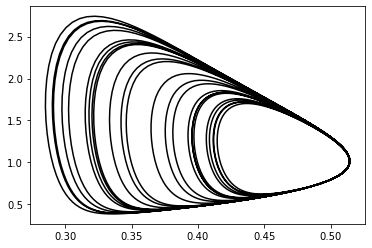

In [108]:
from dysts.flows import *


# eq = Lorenz84()
eq = IsothermalChemical() # relaxation oscillator dynamics / spiking
# eq = ForcedFitzHughNagumo() #  nearly-quasiperiodic
# eq = Lorenz()
# eq = ArnoldBeltramiChildress() # ABC Turbulence
sol = eq.make_trajectory(5000, resample=True, pts_per_period=200)

plt.figure()
plt.plot(sol[:, 0],  'k')


plt.figure()
plt.plot(sol[:, 0], sol[:, 1],  'k')

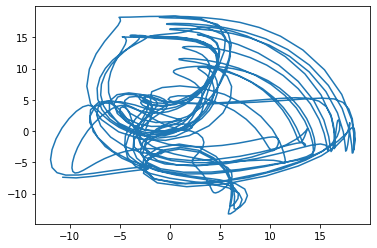